<a href="https://colab.research.google.com/github/HaiderAltaf/Gradient-Descent-Algorithm-and-its-variants/blob/main/cs6910_assig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use from keras.datasets import fashion_mnist for getting the fashion mnist dataset.

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist

In [2]:
import matplotlib.pyplot as plt
import math

importing the Fashion-MNIST Dataset

In [3]:
dataset = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


separating training(60,000 images) and testing(10,000) image data

In [4]:
(x_train, y_train), (x_test, y_test) = dataset
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2] )/255
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255

Separating 10% from training data for validation

In [5]:
validation_size = int(len(X_train)*0.1)

# randomly shuffle the indices of the data
shuffled_indices = np.random.permutation(len(X_train))

# split the shuffled data into training and validation sets
train_indices, validation_indices = shuffled_indices[:-validation_size], shuffled_indices[-validation_size:]
X_train, X_validation = X_train[train_indices], X_train[validation_indices]
y_train, y_validation = y_train[train_indices], y_train[validation_indices]

Number of classes in data

 plot 1 sample image for each class 

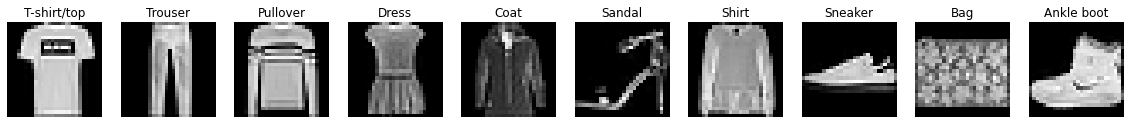

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
          
no_of_classes = len(class_names)
fig, axes = plt.subplots(1, no_of_classes, figsize=(20,20))

for i in range(no_of_classes):

    # Find the index of the first image of each class
    idx = np.where(y_train == i)[0][0]
    
    # Plot the image
    axes[i].imshow(x_train[idx].reshape(28,28), cmap='gray')
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.show()




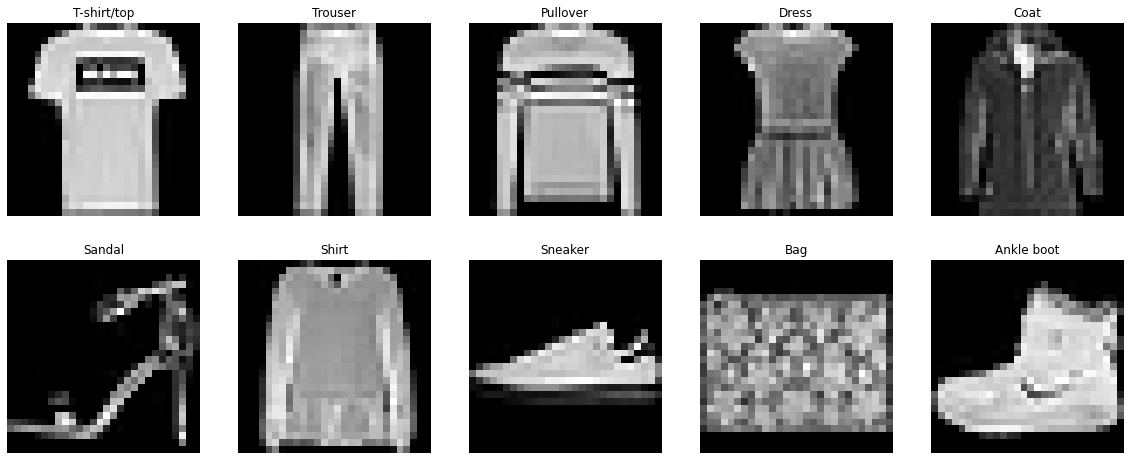

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot images in rows of 5
no_of_classes = len(class_names)
num_rows = 2
num_cols = 5
num_images = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,8))

for i in range(num_images):
    # Calculate the row and column index of the current image
    row = i // num_cols
    col = i % num_cols
    
    # Find the index of the ith image of each class
    idx = np.where(y_train == i % no_of_classes)[0][i // no_of_classes]
    
    # Plot the image
    axes[row, col].imshow(x_train[idx].reshape(28,28), cmap='gray')
    axes[row, col].set_title(class_names[i % no_of_classes])
    axes[row, col].axis('off')

plt.show()

# Question 2 

Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

In [6]:
L = int(input("Enter the number of Hidden + outer layer: "))

Enter the number of Hidden + outer layer: 3


In [7]:
n = int(input("Enter the numbers of neuron in each hidden layer: "))

Enter the numbers of neuron in each hidden layer: 32


In [8]:
no_of_classes = len(np.unique(y_train))

In [9]:
choice = int(input("For random weights initialisation enter 1 and for xavier enter 2: "))

For random weights initialisation enter 1 and for xavier enter 2: 1


In [10]:
def weights(choice, n, L, X_train, no_of_classes):
  
  Weights = []
  np.random.seed(0)

  if choice ==1:
    temp = np.random.rand(len(X_train[0]), n)
    Weights.append(temp)

    for i in range(1, L-1):
      temp = np.random.rand(n, n)
      Weights.append(temp)

    temp = np.random.rand(n, no_of_classes)
    Weights.append(temp)

  if choice ==2:
    scale = 1/max(1, (2+2)/2 )
    limit = math.sqrt(3*scale)

    temp = np.random.uniform(-limit, limit, size=(len(X_train[0]),n)) 
    Weights.append(temp)
    for i in range(1, L-1):
      temp  = np.random.uniform(-limit, limit, size=(n,n))
      Weights.append(temp)

    temp = np.random.uniform(-limit, limit, size=(n, no_of_classes)) 
    Weights.append(temp)

  if choice ==3:
    temp = np.zeros((len(X_train[0]), n))
    Weights.append(temp)

    for i in range(1, L-1):
      temp = np.zeros((n, n))
      Weights.append(temp)

    temp = np.zeros((n, no_of_classes))
    Weights.append(temp)

  
  return Weights



In [11]:
def biases(choice, n, L, y_train, no_of_classes):
  
  bias = []
  np.random.seed(0)

  if choice ==1:
    for i in range(L-1):
      temp = np.random.rand(n)  # for schochastic GD
      #temp = np.random.rand(len(y_train),n)  # for Vanilla GD
      bias.append(temp)
    
    temp = np.random.rand(no_of_classes)   # for schochastic GD
    #temp = np.random.rand(len(y_train), no_of_classes)   # for Vanilla GD
    bias.append(temp)

  if choice ==2:
    scale = 1/max(1, (2+2)/2 )
    limit = math.sqrt(3*scale)
    for i in range(L-1):
      temp  = np.random.uniform(-limit, limit, size=(n))   # for schochastic GD
      #temp  = np.random.uniform(-limit, limit, size=(len(y_train),n))  # for Vanilla GD
      bias.append(temp)

    temp = np.random.uniform(-limit, limit, size=(no_of_classes))   # for schochastic GD
    #temp = np.random.uniform(-limit, limit, size=(len(y_train),no_of_classes)) # for Vanilla GD
    bias.append(temp)

  if choice ==3:
    for i in range(L-1):
      temp = np.zeros(n)
      bias.append(temp)

    temp = np.zeros(no_of_classes)
    bias.append(temp)

  
  return bias


In [172]:
Weights = weights(choice, n, L, X_train, no_of_classes)

In [173]:
bias = biases(choice, n, L, y_train, no_of_classes)

Activation Functions

In [185]:
def sigmoid(a):
  #a = np.float128(a)
  return 1/(1+np.exp(-a))

def tanh(a):
  return (np.exp(a)-np.exp(-a))/(np.exp(a)+np.exp(-a))

def ReLu(a):
  i=0
  Max = 0
  for ele in a:
    a[i] = max(0,ele)
    Max = max(Max, a[i])
    i+=1
  #   j=0
  #   for num in ele:

  #     a[i][j] = max(0,num)
  #     j+=1
  #   i+=1
  return a/Max

def softmax(a):
  # temp = np.zeros_like(a)
  # for i in range(len(temp)):
  #   temp[i] = np.float128(a[i])
  #exp_logits = np.exp(a)
  return np.exp(a)/np.sum(np.exp(a))   
  
def der_sigmoid(a):
  return sigmoid(a)*(1-sigmoid(a))

def der_tanh(a):
  return 1-(tanh(a)*tanh(a))

def der_ReLu(a):

  # it will create a matrix of same dimension as of a.
  gradient = np.zeros_like(a)  
  # sets the entries of gradient to 1 where the corresponding entries of x>=0
  gradient[a >= 0] = 1
  return gradient

Forward Propagation

In [176]:
a = np.dot(X_train[0], Weights[0]) + bias[0]

In [179]:
h = ReLu(a)

In [180]:
h

array([0.97081327, 0.91036207, 0.90933616, 0.98002625, 0.93246296,
       0.93331949, 0.94364305, 0.93648767, 0.96660203, 0.95739357,
       0.95293556, 0.981421  , 0.98480693, 0.9968412 , 0.92048744,
       0.93072126, 0.94272849, 0.97471709, 0.96250636, 0.93374974,
       0.91227207, 0.96257579, 0.94624035, 1.        , 0.97268328,
       0.94546672, 0.98668272, 0.96692143, 0.96805469, 0.97923773,
       0.93708058, 0.96306051])

In [181]:
a = np.dot(h, Weights[1]) + bias[1]

In [182]:
h = ReLu(a)

In [183]:
a = np.dot(h, Weights[2]) + bias[2]

In [186]:
softmax(a)

array([0.10556009, 0.0052391 , 0.01484643, 0.07180335, 0.08670616,
       0.01338796, 0.08056007, 0.12420853, 0.41547525, 0.08221307])

In [26]:
def forward_propagation(Weights, bias, h, L):
  
  a_out = []
  h_out = []
  h_out.append(h)
  
  ## for hidden layers
  for k in range(L-1):
    a = np.dot(h, Weights[k]) + bias[k]
    a_out.append(a)
    ## default activation function is sigmoid 
    h = ReLu(a)
    h_out.append(h)

  ## In outer layer softmax function
  a = np.dot(h, Weights[L-1]) + bias[L-1]
  a_out.append(a)
  y_dash = softmax(a)
  

  return a_out, h_out, y_dash


In [ ]:
def forward_propagation_Vanilla(Weights, bias, h, L):
  
  a_out = []
  h_out = []
  h_out.append(h)
  
  ## for hidden layers
  for k in range(L-1):
    a = np.dot(h, Weights[k]) + bias[k]
    a_out.append(a)
    ## default activation function is sigmoid 
    h = sigmoid(a)
    h_out.append(h)

  ## In outer layer softmax function
  a = np.dot(h, Weights[L-1]) + bias[L-1]
  a_out.append(a)
  y_dash = softmax(a)
  

  return a_out, h_out, y_dash


In [ ]:
a_out, h_out, y_dash = forward_propagation(Weights, bias, X_train[0], L)

In [ ]:
h_out[2].shape, y_dash.shape, len(X_train)

((16,), (54000, 10), 54000)

Backward propagation

In [27]:
def backward_propagation(a_out, h_out, y_train, y_dash, Weights, L):

  delta_W = [0]*L
  delta_b = [0]*L

  
  ## change each y_train into an array of 10 values
  y_train_modified = np.zeros(10)
  y_train_modified[y_train] = 1
    
  output_gradient = -(y_train_modified - y_dash)

  for k in range(L, 0, -1):

    ## compute gradients w.r.t parameters
    W_gradient = np.dot(h_out[k-1].reshape(len(h_out[k-1]),1), output_gradient.reshape(1, len(output_gradient)))
    delta_W[k-1] = W_gradient

    b_gradients = output_gradient
    delta_b[k-1] = b_gradients
   
    if k==1:
      continue
    ## compute gradients w.r.t layer below
    weight = Weights[k-1]
    h_gradient = np.dot(output_gradient, weight.T)

    ## compute the gradient of pre activation layer
    output_gradient = np.multiply(h_gradient, der_ReLu(a_out[k-2]))

  return delta_W, delta_b



In [ ]:
y_train[0]

9

In [ ]:
def backward_propagation_Vanilla(a_out, h_out, y_train, y_dash, Weights, L):

  delta_W = [0]*L
  delta_b = [0]*L

  
  ## change each y_train into an array of 10 values
  def e(y_train):
      size = len(y_train)
      temp = np.zeros((size,10))
      i = 0
      for num in y_train:
        temp[i][num] = 1
        i+=1
      return temp

  output_gradient = -(e(y_train) - y_dash)

  for k in range(L, 0, -1):

    ## compute gradients w.r.t parameters
    W_gradient = np.dot(h_out[k-1].T, output_gradient)
    delta_W[k-1] = W_gradient

    b_gradients = output_gradient
    delta_b[k-1] = b_gradients
   
    if k==1:
      continue
    ## compute gradients w.r.t layer below
    weight = Weights[k-1]
    h_gradient = np.dot(output_gradient, weight.T)

    ## compute the gradient of pre activation layer
    output_gradient = np.multiply(h_gradient, der_sigmoid(a_out[k-2]))

  return delta_W, delta_b




Schotastic Gradient Descent Algorithm

In [138]:
def Schotastic_gradient_descent(learning_rate, Weights, bias, L, y_train, X_train, no_of_classes):
  
  ## initialize the gradients of weights and biases
  dW = weights(3, n, L, X_train, no_of_classes)
  dB = biases(3, n, L, y_train, no_of_classes)
  ## initialize the loss
  cross_entropy_loss = 0
  accuracy = 0

  for x,y in zip(X_train,y_train):

    ##x,y = np.float128(x), np.float128(y)

    ## Forward propagation
    a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
    
    cross_entropy_loss -= np.log(y_dash[y])

    ## Backward Propagation
    delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

    ## Adding the gradients of weights and biases
    dW = [dW[i] + delta_W[i] for i in range(len(dW))]
    dB = [dB[i] + delta_b[i] for i in range(len(dB))]

    ## Weights and biases updates
    # Weights updates
    Weights = [Weights[i] - dW[i]*learning_rate for i in range(L)]

    # Biases updates
    bias = [bias[i] - dB[i]*learning_rate for i in range(L)]
  
  return Weights, bias, cross_entropy_loss


In [139]:
def Vanilla_gradient_descent(learning_rate, Weights, bias, L, y_train, X_train, no_of_classes):
  cross_entropy_loss = 0
  ## initialize the gradients of weights and biases
  dW = weights(3, n, L, X_train, no_of_classes)
  dB = biases(3, n, L, y_train, no_of_classes)
  ## initialize the loss
  cross_entropy_loss = 0
  accuracy = 0

  for x,y in zip(X_train,y_train):

    ##x,y = np.float128(x), np.float128(y)

    ## Forward propagation
    a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
    
    cross_entropy_loss -= np.log(y_dash[y])

    ## Backward Propagation
    delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

    ## Adding the gradients of weights and biases
    dW = [dW[i] + delta_W[i] for i in range(len(dW))]
    dB = [dB[i] + delta_b[i] for i in range(len(dB))]

  ## Weights and biases updates
  # Weights updates
  Weights = [Weights[i] - dW[i]*learning_rate for i in range(L)]

  # Biases updates
  bias = [bias[i] - dB[i]*learning_rate for i in range(L)]

  return Weights, bias, cross_entropy_loss


In [ ]:
for epoch in range(10):
  Weights, bias, cross_entropy_loss = Vanilla_gradient_descent(0.0001, Weights, bias, L, y_train, X_train, no_of_classes)
  print(epoch, cross_entropy_loss)

0 186008.25577767028199
1 864657.05324308260424
2 1484956.9654415523015
3 2139678.0109361840086
4 2557773.2559555828695
5 2785484.0529356675652
6 3451247.921588784459
7 3110830.0880534862724
8 3676211.2724195758228
9 4165923.469021511018


In [189]:
def y_prediction(X_validation, y_validation, Weights, bias, L):

  h = X_validation
  for k in range(L-1):
    a = np.dot(h, Weights[k]) + bias[k][:len(h)]
    ## default activation function is sigmoid 
    h = sigmoid(a)
  ## In outer layer softmax function
  a = np.dot(h, Weights[L-1]) + bias[L-1][:len(h)]
  y_pred = softmax(a)

  correct = 0
  for array,y in zip(y_pred, y_validation):
    if np.argmax(array)==y:
      correct+=1
  accuracy = correct*100/len(y_validation)

  return "The accuracy in % is: ", accuracy

In [190]:
accuracy = y_prediction(X_validation, y_validation, Weights, bias, L)

<ipython-input-185-354c8b4d2089>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


In [191]:
accuracy

('The accuracy in % is: ', 14.916666666666666)

In [ ]:
for epoch in range(10):
  
  Weights, bias, cross_entropy_loss = Schotastic_gradient_descent(0.001, Weights, bias, L, y_train, X_train, no_of_classes)
  print(epoch, cross_entropy_loss)


<ipython-input-15-dca693f527ed>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


0 4316897.7699304729917
1 1390330.5034880982872
2 2165898.8153658933861
3 2207479.193150536024
4 2567898.982508686708
5 1665145.9210685671198
6 1644296.2682321636871
7 1825545.593432836345
8 1855011.4823135913676
9 2718000.965301782336


In [ ]:
for epoch in range(10,20):
  
  Weights, bias, cross_entropy_loss = Schotastic_gradient_descent(0.001, Weights, bias, L, y_train, X_train, no_of_classes)
  print(epoch, cross_entropy_loss)



momentum based Schochastic gradient descent

In [ ]:

def Momentum_SGD(Weights, bias, L, X_train, y_train, beta, no_of_classes, prev_uw, prev_ub, eta):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)
    ## initialize the loss
    cross_entropy_loss = 0

    for x,y in zip(X_train, y_train):

      x = np.float128(x)

      ## Forward propagation
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      # if y_dash[y]<0.5:
      #   continue
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

      ## Adding the gradients of weights and biases
      dW = [dW[i] + delta_W[i] for i in range(len(dW))]
      dB = [dB[i] + delta_b[i] for i in range(len(dB))]

      ## momentum based wight updates
      uw = [prev_uw[i]*beta + dW[i]*eta for i in range(len(dW))]
      ub = [prev_ub[i]*beta + dB[i]*eta for i in range(len(dB))]
      
      ## Weights and biases updates
      # Weights updates
      Weights = [Weights[i] - uw[i] for i in range(len(uw))]

      # Biases updates
      bias = [bias[i] - ub[i] for i in range(len(ub))]

      # assign present to the history 
      prev_uw = uw
      prev_ub = ub

    return  Weights, bias, cross_entropy_loss
    

 Momentum based Vanilla GD

In [ ]:
def Momentum_VGD(Weights, bias, L, X_train, y_train, beta, no_of_classes, prev_uw, prev_ub, eta):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)
    ## initialize the loss
    cross_entropy_loss = 0

    for x,y in zip(X_train, y_train):

      x = np.float128(x)

      ## Forward propagation
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      # if y_dash[y]<0.5:
      #   continue
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

      ## Adding the gradients of weights and biases
      dW = [dW[i] + delta_W[i] for i in range(len(dW))]
      dB = [dB[i] + delta_b[i] for i in range(len(dB))]

    ## momentum based wight updates
    uw = [prev_uw[i]*beta + dW[i]*eta for i in range(len(dW))]
    ub = [prev_ub[i]*beta + dB[i]*eta for i in range(len(dB))]
    
    ## Weights and biases updates
    # Weights updates
    Weights = [Weights[i] - uw[i] for i in range(len(uw))]

    # Biases updates
    bias = [bias[i] - ub[i] for i in range(len(ub))]

    # assign present to the history 
    prev_uw = uw
    prev_ub = ub

    return  Weights, bias, cross_entropy_loss

In [ ]:
## initializing the initial value for momentum(zero)
prev_uw = weights(3, n, L, X_train, no_of_classes)
prev_ub = biases(3, n, L, y_train, no_of_classes)

for i in range(5):
  

In [ ]:
## initializing the initial value for momentum(zero)
prev_uw = weights(3, n, L, X_train, no_of_classes)
prev_ub = biases(3, n, L, y_train, no_of_classes)

for i in range(5):

  Weights, bias, cross_entropy_loss = Momentum_VGD(Weights, bias, L, X_train, y_train, 0.5, no_of_classes, prev_uw, prev_ub, 0.000125)
  print(i, cross_entropy_loss)

0 5906596.1598271256794
1 5906596.1694295621764
2 5906596.179793060357
3 5906596.190917421976
4 5906596.202802443097


In [ ]:
a_out, h_out, y_dash = forward_propagation(Weights, bias, X_train[0], L)
delta_W, delta_b = backward_propagation(a_out, h_out, y_train[0], y_dash, Weights, L)

In [ ]:
U_o = weights(3, n, L, X_train, no_of_classes)

In [ ]:
U_w = np.multiply(U_o, [0.9]*L) + delta_W

In [ ]:
Weights = Weights - np.multiply(U_w, [0.001]*L)

In [ ]:
bias = bias - np.multiply(delta_b, [0.001]*L)

Mini Batch Gradient Descent

In [18]:
def Minibatch_gradient_descent(learning_rate, Weights, bias, L, y_train, X_train, no_of_classes, batch_size):
  
  ## initialize the gradients of weights and biases
  dW = weights(3, n, L, X_train, no_of_classes)
  dB = biases(3, n, L, y_train, no_of_classes)
  ## initialize the loss
  cross_entropy_loss = 0
  num_points_seen = 0

  for x,y in zip(X_train,y_train):

    ##x,y = np.float128(x), np.float128(y)

    ## Forward propagation
    a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
    
    cross_entropy_loss -= np.log(y_dash[y])

    ## Backward Propagation
    delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

    ## Adding the gradients of weights and biases
    dW = [dW[i] + delta_W[i] for i in range(len(dW))]
    dB = [dB[i] + delta_b[i] for i in range(len(dB))]
     
    num_points_seen+=1
    
    if num_points_seen%batch_size == 0:
      ## Weights and biases updates
      # Weights updates
      Weights = [Weights[i] - dW[i]*learning_rate for i in range(L)]

      # Biases updates
      bias = [bias[i] - dB[i]*learning_rate for i in range(L)]
      
      ## initialize the gradients of weights and biases
      dW = weights(3, n, L, X_train, no_of_classes)
      dB = biases(3, n, L, y_train, no_of_classes)
  
  return Weights, bias, cross_entropy_loss


In [ ]:
a_out, h_out, y_dash = forward_propagation(Weights, bias, X_validation[0], L)

In [ ]:
y_dash,y_validation[0]

(array([0.09496257, 0.08837023, 0.09289915, 0.09092248, 0.13849689,
        0.11691721, 0.10805321, 0.08712489, 0.10065996, 0.08159341],
       dtype=float128), 5)

In [ ]:
np.argmax(y_dash)+1

5

In [26]:
for i in range(10):
  Weights, bias, cross_entropy_loss = Minibatch_gradient_descent(0.0001, Weights, bias, L, y_train, X_train, no_of_classes, 25)
  print(i, cross_entropy_loss)

0 255854.41661719723487
1 107273.4848138943569
2 76425.25104909361829
3 61905.60303530317869
4 52543.813349273879552
5 48336.21865390238189
6 46344.26677638381343
7 44516.578714586417057
8 42927.89543402923229
9 41310.808489701444007


Mini Batch Momentum based Gradient Descent

In [24]:
def Minibatch_Momentum_GD(Weights, bias, L, X_train, y_train, beta, no_of_classes, prev_uw, prev_ub, learning_rate, batch_size):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)
    ## initialize the loss
    cross_entropy_loss = 0
    num_points_seen = 0

    for x,y in zip(X_train, y_train):

      #x = np.float128(x)

      ## Forward propagation
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
    
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

      ## Adding the gradients of weights and biases
      dW = [dW[i] + delta_W[i] for i in range(len(dW))]
      dB = [dB[i] + delta_b[i] for i in range(len(dB))]

      num_points_seen +=1
 
      if num_points_seen%batch_size==0:
        ## momentum based wight updates
        uw = [prev_uw[i]*beta + dW[i]*learning_rate for i in range(len(dW))]
        ub = [prev_ub[i]*beta + dB[i]*learning_rate for i in range(len(dB))]
        
        ## Weights and biases updates
        # Weights updates
        Weights = [Weights[i] - uw[i] for i in range(len(uw))]

        # Biases updates
        bias = [bias[i] - ub[i] for i in range(len(ub))]

        # assign present to the history 
        prev_uw = uw
        prev_ub = ub

        dW = weights(3, n, L, X_train, no_of_classes)
        dB = biases(3, n, L, y_train, no_of_classes)

    return  Weights, bias, cross_entropy_loss

In [ ]:
lr=0.0001 
0 125217.9279523200079
1 124791.334193791992874
2 124791.33419379177843
lr=0.001
0 128926.59547633237219
1 128605.14089511223833
2 128605.140894917343836
lr=0.01
0 981859.5428246767486
1 1049694.3521870286147
2 1029440.91528793762353
lr=.1
0 10563152.75025798108
1 5263418.4290938015865
2 3394934.648464207806

lr=1
0 9904796.2547452183835
1 4508884.7683379593695
2 4166146.9885249117713

In [25]:
## initializing the initial value for momentum(zero)
prev_uw = weights(3, n, L, X_train, no_of_classes)
prev_ub = biases(3, n, L, y_train, no_of_classes)

for i in range(100):

  Weights, bias, cross_entropy_loss = Minibatch_Momentum_GD(Weights, bias, L, X_train, y_train, 0.9, no_of_classes, prev_uw, prev_ub, 0.0001, 50)
  print(i, cross_entropy_loss)

0 nan
1 nan


KeyboardInterrupt: ignored

Nesterov Accelerated Gradient Descent

In [187]:
def Minibatch_NAG(Weights, bias, L, X_train, y_train, beta, no_of_classes, prev_vw, prev_vb, learning_rate, batch_size):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)
    ## initialize the loss
    cross_entropy_loss = 0
    num_points_seen = 0

    # do partial updates
    v_w = [beta*prev_vw[i] for i in range(len(prev_vw))]
    v_b = [beta*prev_vb[i] for i in range(len(prev_vb))]

    for x, y in zip(X_train, y_train):

      #x = np.float128(x)

      ## Forward propagation
      Weights = [Weights[i]-v_w[i] for i in range(len(Weights))]
      bias    = [bias[i]-v_b[i] for i in range(len(bias))]
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

      ## Look Ahead
      ## Adding the gradients of weights and biases
      dW = [dW[i] + delta_W[i] for i in range(len(dW))]
      dB = [dB[i] + delta_b[i] for i in range(len(dB))]

      num_points_seen +=1

      if num_points_seen%batch_size==0:
        ## momentum based wight updates
        vw = [prev_vw[i]*beta + dW[i]*learning_rate for i in range(len(dW))]
        vb = [prev_vb[i]*beta + dB[i]*learning_rate for i in range(len(dB))]

        ## Weights and biases updates
        # Weights updates
        Weights = [Weights[i] - vw[i] for i in range(len(vw))]

        # Biases updates
        bias = [bias[i] - vb[i] for i in range(len(vb))]

        # assign present to the history 
        prev_uw = vw
        prev_ub = vb

        dW = weights(3, n, L, X_train, no_of_classes)
        dB = biases(3, n, L, y_train, no_of_classes)

    return  Weights, bias, cross_entropy_loss

In [188]:
## initializing the initial value for momentum(zero)
prev_vw = weights(3, n, L, X_train, no_of_classes)
prev_vb = biases(3, n, L, y_train, no_of_classes)

for i in range(10):
  Weights, bias, cross_entropy_loss = Minibatch_NAG(Weights, bias, L, X_train, y_train, 0.9, no_of_classes, prev_vw, prev_vb, 0.0001, 25)
  print(i,cross_entropy_loss)

0 124334.63969723861
1 114089.96140601054
2 100065.40288870217
3 90643.08911525035
4 84839.91116370758
5 80753.64509107932
6 77648.00767787363
7 75174.92764661534
8 73120.47018418703
9 71382.41387136435


In [163]:
eps=1e-10
y_hat = np.clip(0, eps, 1-eps)

In [164]:
y_hat

1e-10

In [165]:
np.log(y_hat)

-23.025850929940457

In [ ]:
def do_nag(max_epochs):
    w,b,eta = -2,-2,1.0
    prev_vw,prev_vb,beta = 0,0,0.9
   
    for i in range(max_epochs):
        dw,db = 0,0
        # do partial updates
        v_w = beta*prev_vw
        v_b = beta*prev_vb
        for x,y in zip(X,Y):
            # Look ahead
            dw += grad_w(w-v_w,b-v_b,x,y)
            db += grad_b(w-v_w,b-v_b,x,y)
        vw = beta*prev_vw+eta*dw
        vb = beta*prev_vb+eta*db
        w = w - vw
        b = b - vb
        prev_vw = vw
        prev_vb = vb
        